## Movie Genre Data Analysis 
### Introduction
- focusing on genre's in this project
### Research Questions
- which genre are the most common (numbers of movies made)?
- which gernes have high avergage budget and revenue and profit? 
- which gernes have high average popularity?
- which genres have highest number of movies with an voting avg. >=8 ? 
### Research Hyphotheses? 
- the best movies according to vote avg. return high profit and revenue
- the best movies according to popularity return high profit and revenue
- highly budgeted movies return high revenue and profit
- highly budgeted moves have a high popularity
- movies genres per year

In [61]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
movies = pd.read_csv('/Users/thuongnguyen/Documents/Project/Pandas analyst buider /Movie Genre Data Analysis/imdb_movies.csv')

In [63]:
pd.set_option('display.max.row',11000 )
pd.set_option('display.max.column',22 )

In [64]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Cleaning & Transforming dataset

In [65]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.000000,2010,30000000.000000,967000.000000


In [66]:
movies.drop_duplicates(inplace = True) 

In [67]:
movies[movies.duplicated()] #get rid of duplicates 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [68]:
movies.dropna(subset = ['genres'], inplace = True) #get rid of null values in genres 

In [69]:
movies['profit'] = movies['revenue'] - movies['budget']

In [77]:
df_movies = movies[['id','popularity','budget','revenue','original_title','director','runtime','genres','release_date','vote_count','vote_average','profit']] #drop useless columns to faster the run time 

In [78]:
df_movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


In [79]:
from pandas import Series, DataFrame
split = df_movies['genres'].str.split('|').apply(Series,1).stack() #need to drop 1 level of index
split

/var/folders/ff/vgbdwfcx1msgcz_tmnx1d9180000gn/T/ipykernel_6459/906068768.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = df_movies['genres'].str.split('|').apply(Series,1).stack() #need to drop 1 level of index


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [80]:
split.index = split.index.droplevel(-1)


In [81]:
split.name = 'genres_split'
del df_movies['genres']
df_movies = df_movies.join(split)

In [82]:
df_movies

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,profit,genres_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,1/1/66,11,6.500000,0,Mystery
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,1/1/66,11,6.500000,0,Comedy
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,11/2/66,22,5.400000,0,Action
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,11/2/66,22,5.400000,0,Comedy


### Research Questions
1. which genre are the most common (numbers of movies made)?
- which gernes have high avergage budget and revenue and profit? 
- which gernes have high average popularity?
- which genres have highest number of movies with an voting avg. >=8 ? 

In [16]:
common_movies = pd.DataFrame(df_movies.groupby('genres_split')['original_title'].count())

In [17]:
common_movies = common_movies.sort_values(by = 'original_title', ascending = True)

<Axes: title={'center': 'Movies per Genre in %'}, ylabel='original_title'>

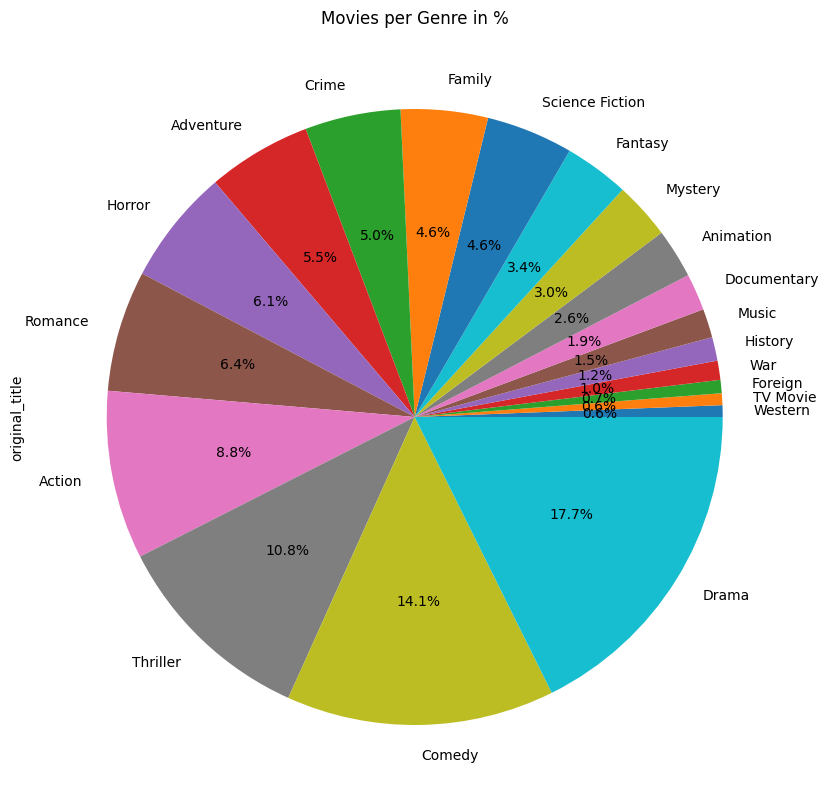

In [18]:
common_movies['original_title'].plot.pie(title = 'Movies per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

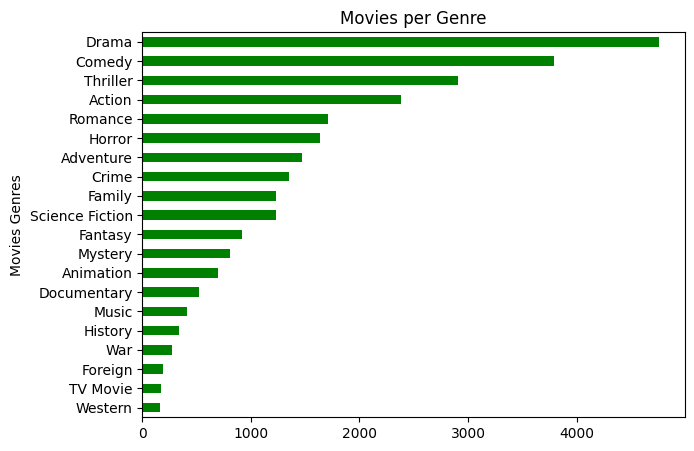

In [179]:
cm = common_movies['original_title'].plot.barh(title = 'Movies per Genre', figsize = (7,5), color = 'green')
cm.set_ylabel('Movies Genres')
plt.show()

## which gernes have high avergage budget and revenue?

In [51]:
genres_avg = df_movies.groupby('genres_split')[['budget','revenue','profit','popularity']].mean()
pd.options.display.float_format = '{:2f}'.format

In [41]:
genres_avg.sort_values(by = 'budget', ascending = True, inplace = True)

Text(0, 0.5, 'Movies Genres')

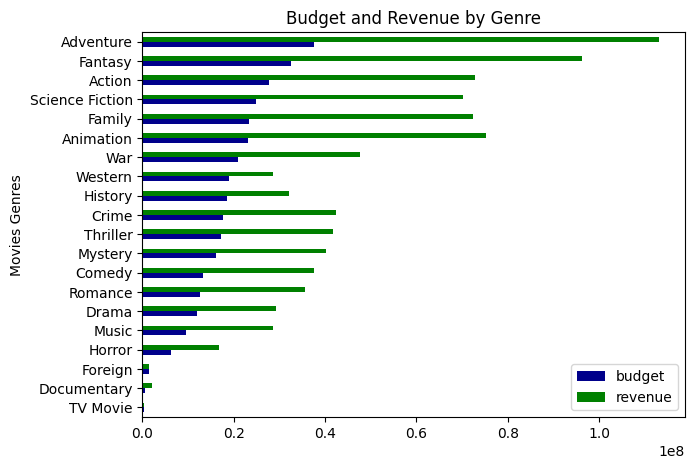

In [43]:
g_avg = genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', figsize = (7,5), color = ('DarkBlue','Green'))
g_avg.set_ylabel('Movies Genres')

## which gernes have high avergage profit? 



In [48]:
genres_avg.sort_values('profit',ascending = True,inplace = True)

Text(0, 0.5, 'Movies Genres')

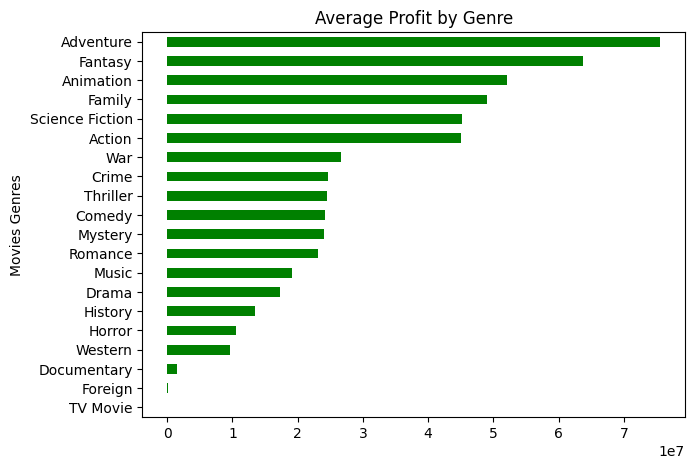

In [49]:
profit_avg = genres_avg['profit'].plot.barh(title = 'Average Profit by Genre', figsize = (7,5), color = ('Green'))
profit_avg.set_ylabel('Movies Genres')

4. which gernes have high average popularity?

In [53]:
genres_avg.sort_values('popularity', inplace = True)

Text(0, 0.5, 'Movies Genres')

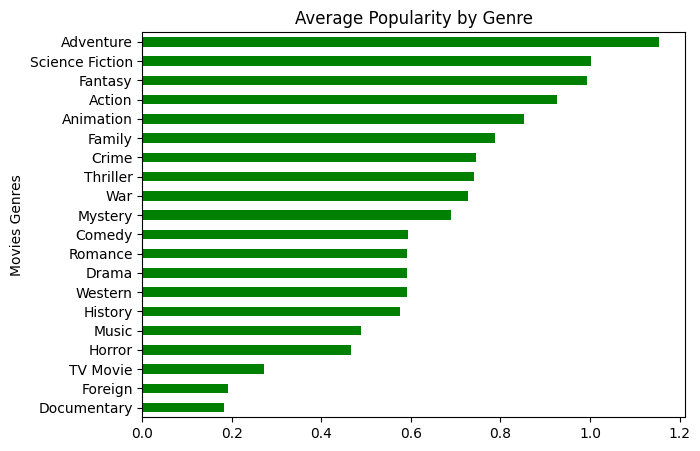

In [54]:
popularity_avg = genres_avg['popularity'].plot.barh(title = 'Average Popularity by Genre', figsize = (7,5), color = ('Green'))
popularity_avg.set_ylabel('Movies Genres')

5. which genres have highest number of movies with an voting avg. >=8 ?

In [83]:
df_movies

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,profit,genres_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.500000,1363528810,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,1/1/66,11,6.500000,0,Mystery
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,1/1/66,11,6.500000,0,Comedy
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,11/2/66,22,5.400000,0,Action
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,11/2/66,22,5.400000,0,Comedy


In [99]:
vote_fifty = df_movies[(df_movies['vote_count'] >= 50) & (df_movies['vote_average'] >= 8)] 
vote_fifty

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,profit,genres_split
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,6/9/15,3935,8.000000,678708609,Comedy
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,6/9/15,3935,8.000000,678708609,Animation
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,6/9/15,3935,8.000000,678708609,Family
35,264644,3.557846,6000000,35401758,Room,Lenny Abrahamson,117,10/16/15,1520,8.000000,29401758,Drama
35,264644,3.557846,6000000,35401758,Room,Lenny Abrahamson,117,10/16/15,1520,8.000000,29401758,Thriller
609,321640,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Andrew Jarecki,240,2/8/15,72,8.400000,0,Documentary
629,157336,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,11/5/14,6498,8.000000,456752480,Adventure
629,157336,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,11/5/14,6498,8.000000,456752480,Drama
629,157336,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,11/5/14,6498,8.000000,456752480,Science Fiction
636,205596,8.110711,14000000,233555708,The Imitation Game,Morten Tyldum,113,11/14/14,3478,8.000000,219555708,History


In [107]:
vote_movies = pd.DataFrame(vote_fifty.groupby('genres_split')['vote_average'].count().sort_values(ascending = True))

In [108]:
vote_movies

,vote_average
genres_split,
Mystery,1
Horror,1
Fantasy,2
Music,2
History,2
Science Fiction,3
Romance,3
Action,3
Comedy,3


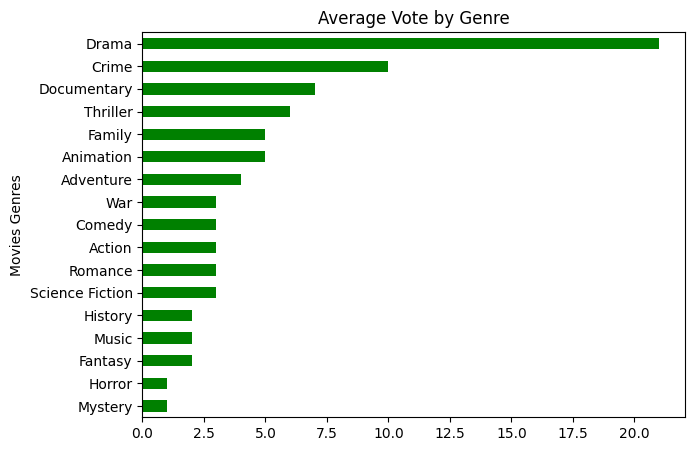

In [109]:
 vote_avg = vote_movies['vote_average'].plot.barh(title = 'Average Vote by Genre', figsize = (7,5), color = ('Green'))
vote_avg = vote_avg.set_ylabel('Movies Genres')

## Research Hyphotheses?
1. the best movies according to vote avg. return high profit and revenue
2. the best movies according to popularity return high profit and revenue
3. highly budgeted movies return high revenue and profit
4. highly budgeted moves have a high popularity

In [111]:
df = pd.read_csv('/Users/thuongnguyen/Documents/Project/Pandas analyst buider /Movie Genre Data Analysis/imdb_movies.csv')
df.drop_duplicates(inplace = True) 
df['profit'] = movies['revenue'] - movies['budget']
df = df[['id','popularity','budget','revenue','original_title','director','runtime','genres','release_date','vote_count','vote_average','profit']] #drop useless columns to faster the run time 

In [113]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810.000000
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354.000000
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201.000000
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225.000000
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360.000000


1. the best movies according to vote avg. return high profit and revenue

In [122]:
df_counted = df[df['vote_count']>=50]
df_counted[['popularity','budget','revenue','runtime','vote_count','vote_average','profit']].corr(method = 'spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498092
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334345
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842278
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.211947
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583606
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198580
profit,0.498092,0.334345,0.842278,0.211947,0.583606,0.198580,1.000000


<Axes: xlabel='vote_count', ylabel='profit'>

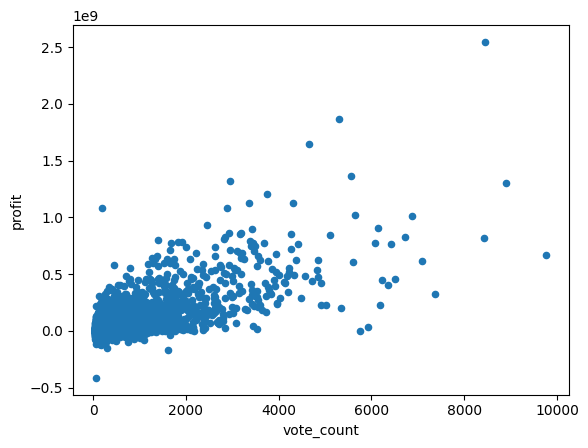

In [123]:
df_counted.plot.scatter(x='vote_count', y='profit')

<Axes: xlabel='vote_average', ylabel='profit'>

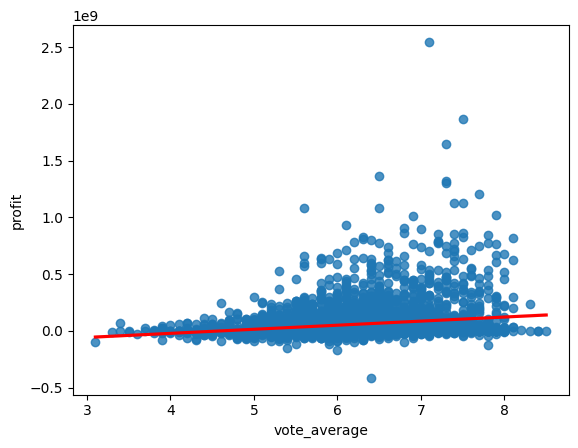

In [128]:
sns.regplot(x='vote_average', y='profit',data = df_counted,line_kws = {"color":'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

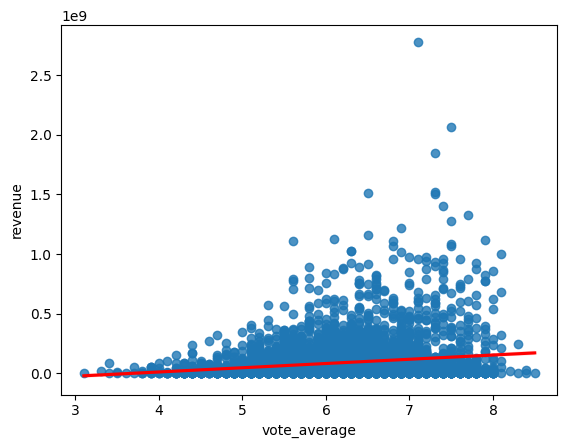

In [129]:
sns.regplot(x='vote_average', y='revenue',data = df_counted,line_kws = {"color":'red'})

2.the best movies according to popularity return high profit and revenue

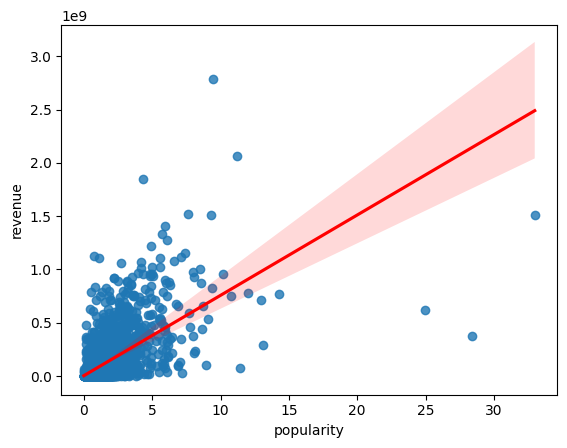

<Figure size 2000x500 with 0 Axes>

In [141]:
sns.regplot(x='popularity', y='revenue',data = df_counted,line_kws = {"color":'red'})
plt.figure(figsize = (20,5))
plt.show()

3.highly budgeted movies return high profit

In [143]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810.000000
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354.000000
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201.000000
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225.000000
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360.000000


<Axes: xlabel='budget', ylabel='revenue'>

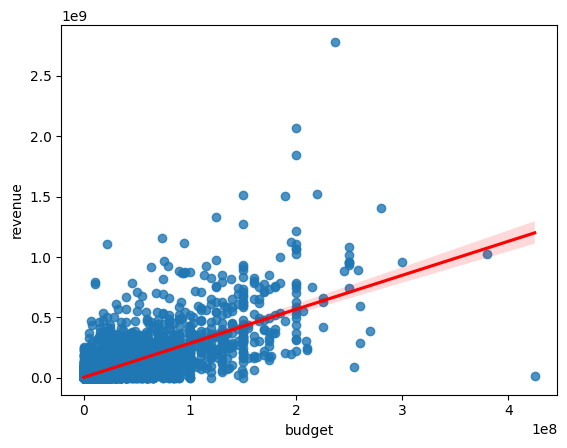

In [146]:

sns.regplot(x='budget', y='revenue',data = df_counted,line_kws = {"color":'red'})

4.highly budgeted moves have a high popularity

<Axes: xlabel='budget', ylabel='popularity'>

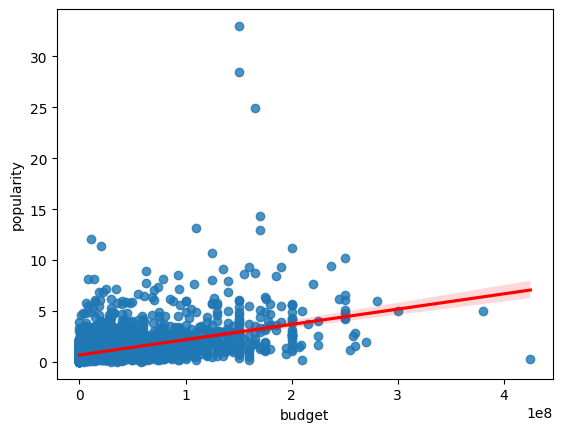

In [147]:

sns.regplot(x='budget', y='popularity',data = df_counted,line_kws = {"color":'red'})

5. Take a look at profit per genre per year

In [152]:
year_movies = pd.read_csv('/Users/thuongnguyen/Documents/Project/Pandas analyst buider /Movie Genre Data Analysis/imdb_movies.csv')
year_movies.drop_duplicates(inplace = True) 
year_movies['profit'] = year_movies['revenue'] - year_movies['budget']
year_movies = year_movies[['id','popularity','budget','revenue','original_title','director','runtime','genres','release_year','vote_count','vote_average','profit']] #drop useless columns to faster the run time 

In [154]:
from pandas import Series, DataFrame
split2 = year_movies['genres'].str.split('|').apply(Series,1).stack() #need to drop 1 level of index
split2.index = split2.index.droplevel(-1)
split2.name = 'genres_split'
del year_movies['genres']
year_movies = year_movies.join(split2)

/var/folders/ff/vgbdwfcx1msgcz_tmnx1d9180000gn/T/ipykernel_6459/145067027.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split2 = year_movies['genres'].str.split('|').apply(Series,1).stack() #need to drop 1 level of index


In [155]:
year_movies

,id,popularity,budget,revenue,original_title,director,runtime,release_year,vote_count,vote_average,profit,genres_split
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015,5562,6.500000,1363528810,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015,5562,6.500000,1363528810,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015,5562,6.500000,1363528810,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015,5562,6.500000,1363528810,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,1966,11,6.500000,0,Mystery
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,1966,11,6.500000,0,Comedy
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,1966,22,5.400000,0,Action
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,1966,22,5.400000,0,Comedy


In [160]:
time_genres = pd.DataFrame(year_movies.groupby(['release_year','genres_split'])['profit'].mean())

In [164]:
final_output = pd.pivot_table(time_genres, values = 'profit', index ='genres_split',columns = 'release_year')

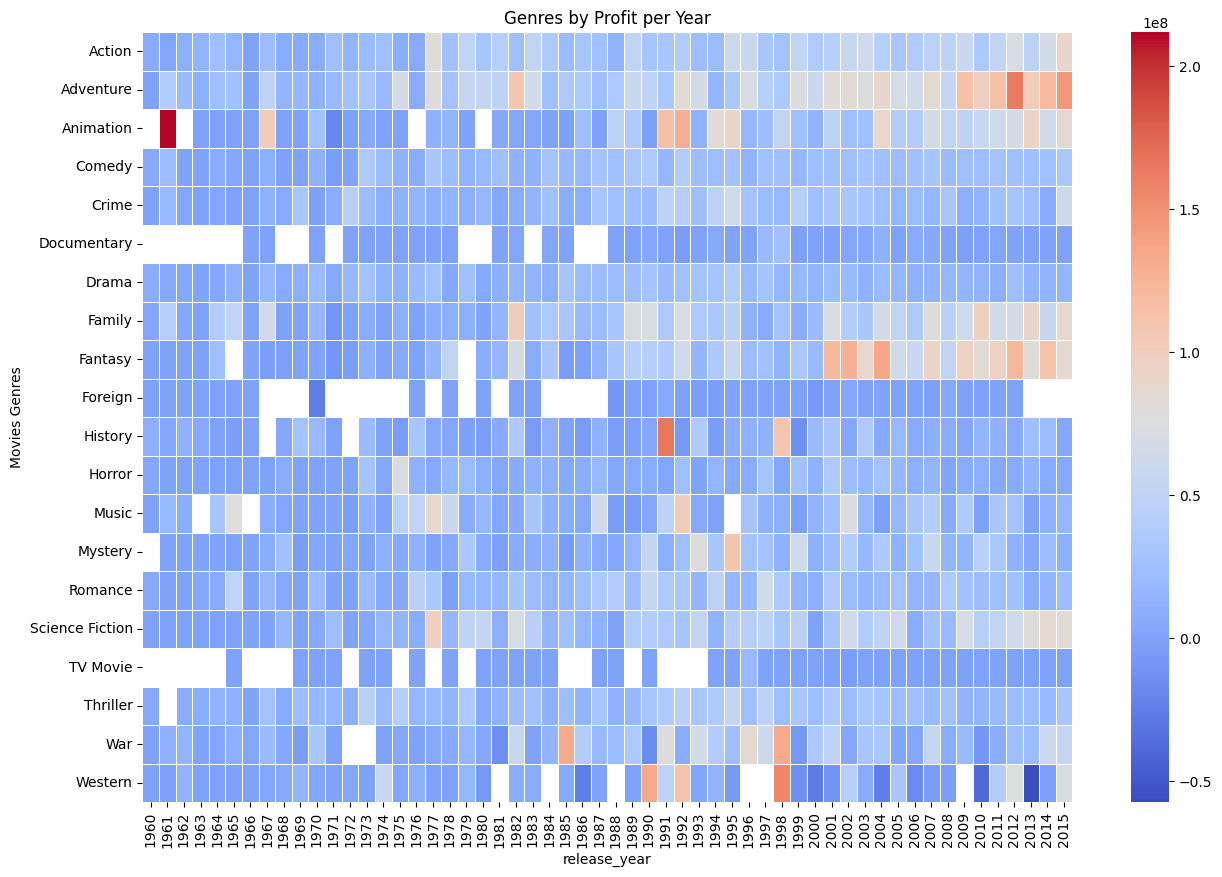

In [178]:
plt.figure(figsize = (15,10))
sns.heatmap(final_output,cmap = 'coolwarm',linewidths = .5 )
plt.title('Genres by Profit per Year')
plt.ylabel('Movies Genres')
plt.show()